In [18]:
import pandas as pd

# Dataset extendido
df = pd.DataFrame({
    'color': ['rojo', 'verde', 'azul', 'rojo', 'azul', 'verde', 'rojo'],
    'marca': ['Toyota', 'Ford', 'Toyota', 'BMW', 'Ford', 'BMW', 'Toyota'],
    'motor': ['nafta', 'diesel', 'eléctrico', 'nafta', 'eléctrico', 'diesel', 'nafta'],
    'año': [2020, 2019, 2021, 2018, 2022, 2019, 2021],
    'precio': [22000, 18000, 15000, 24000, 16000, 19000, 25000]
})

df


,color,marca,motor,año,precio
0,rojo,Toyota,nafta,2020,22000
1,verde,Ford,diesel,2019,18000
2,azul,Toyota,eléctrico,2021,15000
3,rojo,BMW,nafta,2018,24000
4,azul,Ford,eléctrico,2022,16000
5,verde,BMW,diesel,2019,19000
6,rojo,Toyota,nafta,2021,25000


In [ ]:
X = pd.get_dummies(df[['color', 'marca', 'motor', 'año']], drop_first=True)
y = df['precio']
X

,año,color_rojo,color_verde,marca_Ford,marca_Toyota,motor_eléctrico,motor_nafta
0,2020,True,False,False,True,False,True
1,2019,False,True,True,False,False,False
2,2021,False,False,False,True,True,False
3,2018,True,False,False,False,False,True
4,2022,False,False,True,False,True,False
5,2019,False,True,False,False,False,False
6,2021,True,False,False,True,False,True


### 🧠 ¿Por qué año no se convierte en variable dummy?
```python
pd.get_dummies(df[['color', 'marca', 'motor', 'año']], drop_first=True)
```

Este código aplica `get_dummies` **solo a las columnas categóricas**, y deja las **numéricas tal como están**.

`color`, `marca`, `motor` → son **categóricas**, se transforman en dummies.

`año` → es una **variable numérica continua**, no necesita (ni debe) transformarse en dummies para regresión lineal.

In [20]:
y

0    22000
1    18000
2    15000
3    24000
4    16000
5    19000
6    25000
Name: precio, dtype: int64

---
---
### ❓ ¿Por qué se elimina la primera columna al usar variables dummies (`drop_first=True`)?

Cuando transformamos variables categóricas en variables numéricas mediante **dummies**, por ejemplo con `pandas.get_dummies()`, se crea una **columna binaria (0 o 1)** para cada categoría.


### 🎯 Ejemplo:

Supongamos una variable llamada `color` con 3 valores posibles:

```python
color = ['rojo', 'verde', 'azul']
```

Si aplicamos:

```python
pd.get_dummies(df['color'])
```

Obtenemos:

| color\_azul | color\_rojo | color\_verde |
| ----------- | ----------- | ------------ |
| 0           | 1           | 0            |
| 0           | 0           | 1            |
| 1           | 0           | 0            |

Esto crea 3 columnas, una por cada categoría.

### 🧠 ¿Cuál es el problema?

Estas 3 columnas son **linealmente dependientes**, porque si sabemos el valor de dos de ellas, podemos deducir la tercera. Por ejemplo

```python
color_azul = 1 - (color_rojo + color_verde)
```

Esto genera un problema conocido como **colinealidad perfecta** o **multicolinealidad**, que afecta especialmente a los modelos de regresión lineal:

* El modelo no puede estimar los coeficientes correctamente.

* Las predicciones pueden ser inestables.

* El modelo se vuelve redundante y menos interpretativo.

### ✅ Solución: `drop_first=True`

Cuando usamos:

```python
pd.get_dummies(df['color'], drop_first=True)
```

Se elimina la **primera categoría** (por orden alfabético o como aparece en los datos). Esta categoría se convierte en la **categoría base o de referencia**.

Ejemplo resultado:

| color\_rojo | color\_verde |
| ----------- | ------------ |
| 1           | 0            |
| 0           | 1            |
| 0           | 0            |


Entonces:

* Si ambas columnas son 0 → el color es **azul** (la categoría base).

* Esto **elimina la colinealidad** y permite que el modelo funcione correctamente.

### 🧠 ¿Cómo interpretar los coeficientes?

En una regresión lineal:

* El **intercepto** representa el valor de la variable dependiente (por ejemplo, precio) cuando todas las variables dummy son cero, es decir, cuando se trata de la categoría base.

* Los **coeficientes de las dummies** indican cuánto **aumenta** o **disminuye** el valor respecto a la **categoría base**.

Por ejemplo, si:

* Intercepto: 15,000

* `color_rojo`: +3,000

* `color_verde`: +1,000

Entonces:

* Un auto **azul** (la base) cuesta $15,000.

* Un auto **rojo** cuesta $18,000.

* Un auto **verde** cuesta $16,000.

### ✅ Conclusión

Siempre que uses variables categóricas en regresión lineal, es buena práctica aplicar `drop_first=True` para evitar colinealidad y lograr un modelo matemáticamente válido, interpretable y estable.

---
---

In [21]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X, y)


LinearRegression()

In [22]:
# Coeficientes e intercepto
print("Intercepto:", modelo.intercept_)
for feature, coef in zip(X.columns, modelo.coef_):
    print(f"{feature}: {coef:.2f}")


Intercepto: -1798380.0000000044
año: 900.00
color_rojo: 2940.00
color_verde: 580.00
marca_Ford: -1600.00
marca_Toyota: -2300.00
motor_eléctrico: -3520.00
motor_nafta: 2940.00


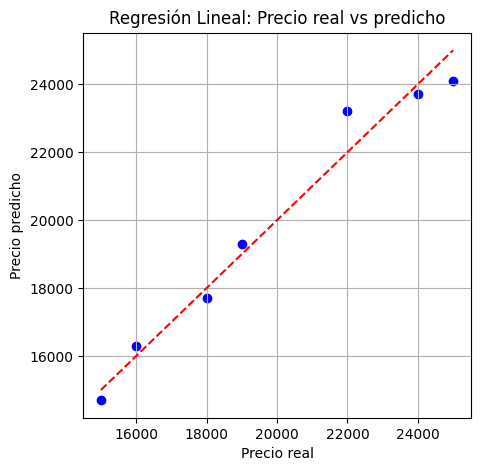

In [23]:
import matplotlib.pyplot as plt

y_pred = modelo.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred, color='blue')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel("Precio real")
plt.ylabel("Precio predicho")
plt.title("Regresión Lineal: Precio real vs predicho")
plt.grid(True)
plt.show()


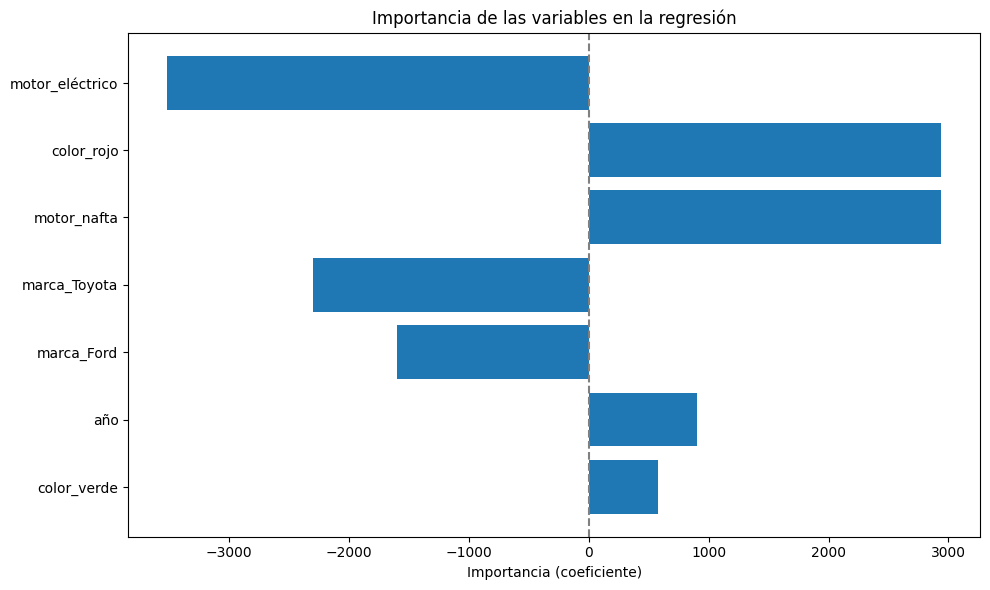

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Obtener nombres y coeficientes
features = X.columns
coeficientes = modelo.coef_

# Ordenar por magnitud de coeficientes
indices = np.argsort(np.abs(coeficientes))

plt.figure(figsize=(10, 6))
plt.barh(range(len(coeficientes)), coeficientes[indices], align='center')
plt.yticks(range(len(coeficientes)), features[indices])
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("Importancia (coeficiente)")
plt.title("Importancia de las variables en la regresión")
plt.tight_layout()
plt.show()
